In [1]:
import os
import numpy as np
import cv2 as cv
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
#Cargar modelo
model = keras.models.load_model('emnist_v5.h5')

In [ ]:
image= cv.imread('Ejemplos/Bh.png')
imagegray = cv.cvtColor(  image, cv.COLOR_BGR2GRAY)

(thresh, imagebw) = cv.threshold(imagegray, 127, 255, cv.THRESH_BINARY)

imageN= cv.resize(cv.subtract(255, imagebw), (28,28), interpolation = cv.INTER_LINEAR)/255
#cv.subtract(255, image)

plt.imshow(image)
plt.show()

plt.imshow(imageN, cmap='Greys_r')
plt.show()

Test=imageN.reshape(1,28,28,1)
predicted1 = model.predict(Test)
predicted=np.argmax(predicted1)

label=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
print( "La letra es una"+" "+ label[predicted-1])    

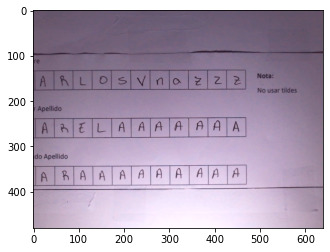

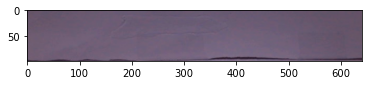

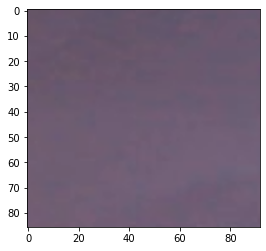

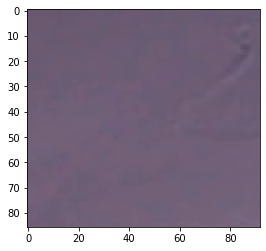

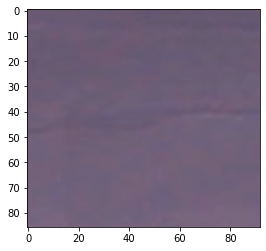

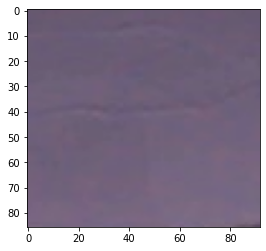

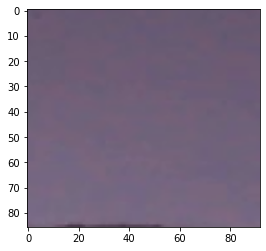

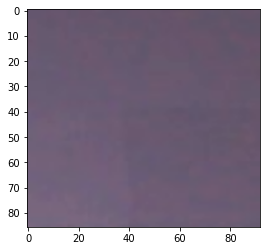

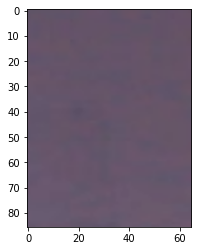

ValueError: zero-size array to reduction operation minimum which has no identity

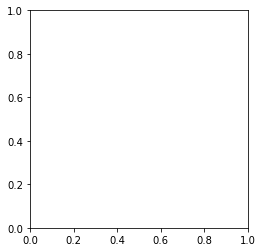

In [3]:
##Proyecto- tomar foto de formulario y sacar letras
#Cargar form y sacar letras
#image= cv.imread('Ejemplos/EjemploForm.png')

#Toma de fotos
camera = cv.VideoCapture(0)
return_value, image = camera.read()
cv.imwrite('opencv.png', image)
del(camera)

plt.imshow(image)
plt.show() 

def obtenerLetras(imagen):
    col = 2
    i = 0
    lista = []
    for i in range(12):
        letra = imagen[4:90 , col+3:col+95]
        plt.imshow(letra)
        plt.show()
        lista.append(letra)
        col+=95
    return lista

Nombre = image[0:97 , 0:1150]
plt.imshow(Nombre)
plt.show() 
listaNombre = obtenerLetras(Nombre)

Apellido1 = image[235:320 , 3:1150]
plt.imshow(Apellido1)
plt.show()
listaApellido1 = obtenerLetras(Apellido1)

Apellido2 = image[472:560 , 3:1150]
plt.imshow(Apellido2)
plt.show()
listaApellido2 = obtenerLetras(Apellido2)

In [ ]:
#####Proyecto- predecir letras
def preproc(imagen):
    imagegray = cv.cvtColor(  imagen, cv.COLOR_BGR2GRAY)
    (thresh, imagebw) = cv.threshold(imagegray, 127, 255, cv.THRESH_BINARY)
    imageN= cv.resize(cv.subtract(255, imagebw), (28,28), interpolation = cv.INTER_LINEAR)/255
    #plt.imshow(image)
    #plt.show()

    #plt.imshow(imageN, cmap='Greys_r')
    #plt.show()

    imageproc=imageN.reshape(1,28,28,1)
    return imageproc

def predictlist (list1, list2):
    for i in list1:
        imageproc= preproc(i)
        predicted1 = model.predict(imageproc)
        predicted=np.argmax(predicted1)
        list2.append(predicted)
    return list2

predictNombre=[]
predictApellido1=[]
predictApellido2=[]

#Cargar modelo
model = keras.models.load_model('emnist_v5.h5')

#Definir labels
label=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

predictlist(listaNombre, predictNombre)
predictlist(listaApellido1, predictApellido1)
predictlist(listaApellido2, predictApellido2)

print( predictNombre, predictApellido1,predictApellido2)  

In [ ]:
from scipy import io as sio
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from time import time
from keras.callbacks import TensorBoard

In [ ]:
#load dataset
mat = sio.loadmat('data/emnist-letters.mat')
data = mat['dataset']
# https://stackoverflow.com/questions/51125969/loading-emnist-letters-dataset/53547262#53547262
X_train = data['train'][0,0]['images'][0,0]
y_train = data['train'][0,0]['labels'][0,0]
X_test = data['test'][0,0]['images'][0,0]
y_test = data['test'][0,0]['labels'][0,0]
# reshape the data into 2D, 28x28 sized images instead of a 1D 784 array
# to get the correct image orientation, need to do a numpy reshape using Fortran ordering
# (Matlab uses column-major ordering, just like Fortran
# https://stackoverflow.com/questions/51125969/loading-emnist-letters-dataset/53547262#53547262
x_train = X_train.reshape((X_train.shape[0], 28, 28), order='F')
y_train = y_train.reshape(-1)
x_test = X_test.reshape((X_test.shape[0], 28, 28), order = 'F')   
y_test = y_test.reshape(-1)
# the data, split between train and validation sets
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.167, random_state = 0, shuffle=True)
# we want to have the same size for valid and test
print(x_train.shape,y_train.shape, x_valid.shape,y_valid.shape,x_test.shape,y_test.shape)

In [ ]:
Validation= x_valid[230]
Validationlabel= y_valid[230]

ValidationN= Validation/255
print(Validationlabel)

plt.imshow(Validation, cmap='Greys_r')
plt.show()

plt.imshow(ValidationN, cmap='Greys_r')
plt.show()

ValTest=ValidationN.reshape(1,28,28,1)
predicted1 = model.predict(ValTest)
predicted=np.argmax(predicted1)

label=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
print( "Se predijo una"+" "+ label[predicted-1] + " "+ "Y en realidad es una" + " " + label[Validationlabel-1])  